# Importing  libraries and reading data

In [6818]:
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots

import warnings
sns.set_theme(palette=sns.color_palette("muted"),style="darkgrid")

In [6819]:
data = pd.read_csv("IMDb Movies India.csv",encoding='latin-1')

In [6820]:
data.sample(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
3539,Dee Saturday Night,(2014),NaN,Drama,NaN,NaN,Jayprakkash Shaw,Wasim Khan,NaN,NaN
3628,Desi Videsi,NaN,NaN,Family,NaN,NaN,Ajay Dixit,Radhika Madan,Siddhant Chaturvedi,NaN
1368,Aulaad Ki Khatir,(1990),NaN,Drama,NaN,NaN,Kanwar Jagdish,Mohan Choti,Deep Dhillon,Kamal Kapoor
13892,Teesri Manzil,(1966),172 min,"Comedy, Musical, Mystery",7.7,"1,135",Vijay Anand,Shammi Kapoor,Asha Parekh,Raj Mehra
5000,Ghajini,(2008),186 min,"Action, Drama, Mystery",7.3,"57,604",A.R. Murugadoss,Aamir Khan,Asin Thottumkal,Jiah Khan
6088,Inquilab,(1956),NaN,NaN,NaN,NaN,Kedar Kapoor,Helen,Kuldip Kaur,M. Rajan
7475,Khaidi Inspector,(1995),NaN,Action,NaN,NaN,Maheshwari,Rambha,Suman,NaN
7998,Ladies First,(2014),106 min,Romance,3.6,20,Ashok Mehta,Ruby Ahmed,Khushboo Khan,Gautmi
5658,Hello Zindagi,(2010),125 min,"Drama, Family",6.0,13,Raja Unnithan,Kitu Gidwani,Milind Gunaji,Neena Gupta
8365,Loving Doll,(2012),NaN,Thriller,NaN,NaN,Pavan Kaul,Karan Singh Grover,Diana Hayden,NaN


In [6821]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


# Data cleaning

In [6822]:
data.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

## Removing NaN values

In [6823]:
#data= data.dropna(subset=["Year","Genre","Director","Actor 1","Actor 2","Actor 3","Rating"])

In [6824]:
data = data.dropna().reset_index(drop=True)

In [6825]:
data.shape

(5659, 10)

## Changing duration and votes to numeric

In [6826]:
data["Duration"] = data.loc[:,"Duration"].str.replace(" min","")
data["Duration"] = pd.to_numeric(data.loc[:,"Duration"])

In [6827]:
data["Votes"] = data.loc[:,"Votes"].str.replace(",","")
data["Votes"] = pd.to_numeric(data.loc[:,"Votes"])

In [6828]:
#data["Duration"] = data.loc[:,'Duration'].fillna(data.Duration.mean())

In [6829]:
#data = data.dropna().reset_index(drop=True)

In [6830]:
data.shape

(5659, 10)

## Removing duplicated data

In [6831]:
data.duplicated(subset=["Name","Year"]).sum()

2

In [6832]:
data=data.drop_duplicates(keep="first",subset=["Name","Year"]).reset_index(drop=True)

In [6833]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

# Changing year column to date and cleaning genre

In [6834]:
data["Year"] = data.loc[:,"Year"].str.extract(r"(\d{4})")
data["Year"] = pd.to_numeric(data.loc[:,"Year"])
#data["Year"] = pd.to_datetime(data.loc[:,"Year"],format="%Y")

In [6835]:
data["Genre"] = data.loc[:,"Genre"].str.replace("Musical","Music")

## Making new genre column for further analysis

In [6836]:
data["Genre"] = data.loc[:,"Genre"].str.extract("(^\w{1,11})")

In [6837]:
data["Genre"].unique()

array(['Drama', 'Comedy', 'Horror', 'Action', 'Crime', 'Thriller',
       'Adventure', 'Sport', 'Biography', 'Documentary', 'Mystery',
       'Music', 'Romance', 'Fantasy', 'Sci', 'Family', 'History',
       'Animation', 'War'], dtype=object)

## Removing outliers

In [6838]:
data.describe()

,Year,Duration,Rating,Votes
count,5657.000000,5657.00000,5657.000000,5657.00000
mean,1996.254198,133.44087,5.897967,2698.59802
std,19.729583,25.32374,1.381035,13653.82378
min,1931.000000,21.00000,1.100000,5.00000
25%,1983.000000,119.00000,5.000000,30.00000
50%,2002.000000,135.00000,6.100000,131.00000
75%,2013.000000,150.00000,6.900000,923.00000
max,2021.000000,321.00000,10.000000,591417.00000


In [6839]:
#data = data[(np.abs(stats.zscore(data[['Rating','Votes','Duration']])) < 3).all(axis=1)]

In [6840]:
#data = data.query("(Rating < 9.1) & (Rating > 2) & (Votes > 20) & (Duration > 60)")

In [6841]:
data.shape

(5657, 10)

In [6842]:
data.Genre.value_counts()

Drama          1842
Action         1651
Comedy          989
Crime           271
Romance         159
Horror          128
Adventure       105
Music            93
Thriller         89
Biography        83
Mystery          59
Family           52
Documentary      48
Animation        40
Fantasy          31
History           8
Sci               4
War               3
Sport             2
Name: Genre, dtype: int64

# Univariate analysis

In [6843]:
iplot(px.violin(data_frame=data,x="Rating"))

In [6844]:
iplot(px.violin(data_frame=data,x="Duration"))

In [6845]:
iplot(px.violin(data_frame=data,x="Year"))

In [6846]:
iplot(px.violin(data_frame=data,x="Votes"))

In [6847]:
data.Genre.value_counts().reset_index()

,index,Genre
0,Drama,1842
1,Action,1651
2,Comedy,989
3,Crime,271
4,Romance,159
5,Horror,128
6,Adventure,105
7,Music,93
8,Thriller,89
9,Biography,83


In [6848]:
data.Genre.value_counts().reset_index()


,index,Genre
0,Drama,1842
1,Action,1651
2,Comedy,989
3,Crime,271
4,Romance,159
5,Horror,128
6,Adventure,105
7,Music,93
8,Thriller,89
9,Biography,83


In [6849]:
genres = data.Genre.value_counts().reset_index()
iplot(px.pie(data_frame=genres,names=genres.Genre,values=genres["Genre"],title="Number of movies by Genre",height=1050)\
      .update_traces(textinfo="value+percent"))

# Multivariate analysis

In [6850]:
rating_by_genre = data.groupby("Genre")["Rating"].mean().sort_values(ascending = False)
iplot(px.bar(data_frame=rating_by_genre))

In [6851]:
movies_by_year = data["Year"].value_counts().reset_index().sort_values(by="index")

iplot(px.line(data_frame=movies_by_year,x="index",y="Year",title="Number of Movies over the years",\
              color_discrete_sequence=["green"]))

In [6852]:
Rating_by_years = data.groupby("Year").agg({"Rating":"mean","Votes":"sum"}).reset_index()

In [6853]:
iplot(px.line(data_frame=Rating_by_years,x="Year",y="Rating",markers=True,color_discrete_sequence=["green"],height=400))

In [6854]:
iplot(px.line(data_frame=Rating_by_years,x="Year",y="Votes",color_discrete_sequence=["Red"],markers=True,height=400))

In [6855]:
data.groupby("Actor 1")["Rating"].agg(["mean","count"])\
.query("count >=10")\
.sort_values(by="mean",ascending=False)[:10]\
.reset_index()


,Actor 1,mean,count
0,Nargis,7.454545,22
1,Irrfan Khan,7.152941,17
2,Balraj Sahni,7.130769,13
3,Amol Palekar,7.061538,13
4,Dilip Kumar,7.043333,30
5,Ayushmann Khurrana,7.038462,13
6,Rajkummar Rao,7.027273,11
7,Raj Kapoor,6.919355,31
8,Shammi Kapoor,6.914286,35
9,Meena Kumari,6.900000,19


In [6856]:
def top_10_rating(col):
    return data.groupby(col)["Rating"].agg(["mean","count"])\
    .query("count >=10")\
    .sort_values(by="mean",ascending=False)[:10]\
    .reset_index()

In [6857]:
top_10_actors1 = top_10_rating("Actor 1")

iplot(px.bar(data_frame=top_10_actors1,x="Actor 1",y="mean",text="count",\
    labels = {'Actor 1':'Main Actor','mean':'Rating','count':'Number of movies'},\
             title="Top 10 Main actors with more than 10 movies by rating"))

In [6858]:
top_10_director = top_10_rating("Director")

iplot(px.bar(data_frame=top_10_director,x="Director",y="mean",text="count",labels = {'mean':'Rating','count':'Number of movies'},\
            title="Top 10 Directors with more than 10 movies by rating"))

In [6859]:
top_10_actors2 = top_10_rating("Actor 2")

iplot(px.bar(data_frame=top_10_actors2,x="Actor 2",y="mean",text="count",labels = {'mean':'Rating','count':'Number of movies'},\
            title="Top 10 secondary actors with more than 10 movies by rating"))

# Importing libraries for machine learning and transforming data

In [7010]:
from sklearn.model_selection import train_test_split,cross_val_score
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.preprocessing import RobustScaler,StandardScaler,MaxAbsScaler,MinMaxScaler
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
import sklearn.metrics as metrics
import scikitplot as skplt
import category_encoders as ce

In [6861]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('Median absolute error: ',round(median_absolute_error,4))

In [6862]:
def one_hot_encoding(df):
    dums = pd.get_dummies(df["main_genre"],dtype=int)
    model_data = pd.concat([df,dums],axis=1).drop(columns="main_genre")
    return model_data

In [6863]:
data =data.drop(columns=["Name"])

In [6864]:
cat_cols = ["Director","Actor 1","Actor 2","Actor 3","Genre"]

In [6865]:
#

In [6866]:
#data=data.drop(columns=cat_cols)

In [6867]:
X = data.drop(columns="Rating")
y = data["Rating"]

In [6868]:
#X = one_hot_encoding(X)

In [6869]:
X

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
0,2019,109,Drama,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,2019,110,Comedy,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,1997,147,Comedy,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,2005,142,Drama,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,2012,82,Horror,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...
5652,2015,115,Drama,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
5653,2001,153,Biography,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
5654,1989,125,Action,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
5655,1999,129,Action,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [6870]:
encoder = ce.JamesSteinEncoder(return_df=True)

In [6871]:
encoder.fit(X,y)
X = encoder.transform(X.loc[:,:])

In [6872]:
X

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
0,2019,109,6.105142,8,7.000000,6.828078,7.000000,7.000000
1,2019,110,5.865487,35,4.400000,5.600286,4.400000,4.453783
2,1997,147,5.865487,827,5.592358,5.243697,5.844846,5.884539
3,2005,142,6.105142,1086,7.180648,5.656358,6.710600,6.209600
4,2012,82,5.171712,326,5.600000,5.600000,5.892097,5.600000
...,...,...,...,...,...,...,...,...
5652,2015,115,6.105142,408,6.100000,6.359142,6.100000,5.852948
5653,2001,153,6.356984,1496,6.977621,5.244998,5.848256,5.933249
5654,1989,125,5.673822,44,6.207326,6.214266,5.800000,6.019710
5655,1999,129,5.673822,655,5.375049,5.677440,4.908542,5.808426


In [6873]:
scaler = RobustScaler()
scaler.fit(X)
X.loc[:,:] = scaler.transform(X.loc[:,:])

In [6874]:
X

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.566667,-0.838710,0.555632,-0.137738,0.995031,1.047563,1.161752,1.241457
1,0.566667,-0.806452,0.000000,-0.107503,-1.516391,-0.381146,-1.695281,-1.721763
2,-0.166667,0.387097,0.000000,0.779395,-0.364654,-0.796089,-0.107599,-0.056687
3,0.100000,0.225806,0.555632,1.069429,1.169525,-0.315899,0.843742,0.321611
4,0.333333,-1.709677,-1.608491,0.218365,-0.357273,-0.381479,-0.055677,-0.387826
...,...,...,...,...,...,...,...,...
5652,0.433333,-0.645161,0.555632,0.310190,0.125693,0.501890,0.172779,-0.093452
5653,-0.033333,0.580645,1.139518,1.528555,0.973415,-0.794574,-0.103852,0.000000
5654,-0.433333,-0.322581,-0.444368,-0.097424,0.229363,0.333306,-0.156879,0.100621
5655,-0.100000,-0.193548,-0.444368,0.586786,-0.574561,-0.291368,-1.136465,-0.145265


In [6875]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7,shuffle=True)

In [7089]:
lgbm_model = XGBRegressor(objective ='reg:squarederror',gamma=1.3,learning_rate=0.127,max_delta_step=10)

In [7090]:
lgbm_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=1.3, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.127, max_delta_step=10,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [7091]:
lgbm_model.score(X_train,y_train)

0.9088974523415339

In [7092]:
lgbm_model.score(X_test,y_test)

0.8407261264574455

In [6880]:
y_pred = lgbm_model.predict(X_test)
print(f"Report:Lgbm model")
print(f"{regression_results(y_test, y_pred)}\n")

Report:Lgbm model
explained_variance:  0.8425
mean_squared_log_error:  0.0095
r2:  0.842
MAE:  0.3641
MSE:  0.3125
RMSE:  0.559
Median absolute error:  0.2215
None



In [7093]:
gbm = GradientBoostingRegressor(alpha=0.85, loss='huber', max_depth=5,
                          max_features=0.8, min_samples_split=8,
                          subsample=0.9)

In [7094]:
gbm.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.85, loss='huber', max_depth=5,
                          max_features=0.8, min_samples_split=8, subsample=0.9)

In [7095]:
gbm.score(X_train,y_train)

0.8979638055583381

In [7096]:
gbm.score(X_test,y_test)

0.8349360741012867

In [6885]:
y_pred = gbm.predict(X_test)
print(f"Report:xg")
print(f"{regression_results(y_test, y_pred)}\n")

Report:xg
explained_variance:  0.838
mean_squared_log_error:  0.01
r2:  0.8369
MAE:  0.3695
MSE:  0.3225
RMSE:  0.5679
Median absolute error:  0.2184
None



In [7023]:
gbm_stack =GradientBoostingRegressor(alpha=0.85, loss='huber', max_depth=5,
                          max_features=0.8, min_samples_split=8,
                          subsample=0.9)

In [7027]:
estimators = [
    ("RidgeCV",RidgeCV())
]
stacking_regressor = StackingRegressor(StackingRegressor(estimators=estimators, final_estimator=gbm_stack))

In [7028]:
stacking_regressor

StackingRegressor(estimators=StackingRegressor(estimators=[('RidgeCV',
                                                            RidgeCV())],
                                               final_estimator=GradientBoostingRegressor(alpha=0.85,
                                                                                         loss='huber',
                                                                                         max_depth=5,
                                                                                         max_features=0.8,
                                                                                         min_samples_split=8,
                                                                                         subsample=0.9)))

In [7097]:
estimators = [

    ('RidgeCV',RidgeCV()),


]

reg = StackingRegressor( estimators=estimators,final_estimator=GradientBoostingRegressor(alpha=0.85, loss='huber', max_depth=5,
                          max_features=0.8, min_samples_split=8,
                          subsample=0.9))

In [7098]:
reg.fit(X_train,y_train)

StackingRegressor(estimators=[('RidgeCV', RidgeCV())],
                  final_estimator=GradientBoostingRegressor(alpha=0.85,
                                                            loss='huber',
                                                            max_depth=5,
                                                            max_features=0.8,
                                                            min_samples_split=8,
                                                            subsample=0.9))

In [7099]:
reg.score(X_train,y_train)

0.7788738151895607

In [7100]:
reg.score(X_test,y_test)

0.7711777849917227

In [7101]:
y_pred = reg.predict(X_test)
print(f"Report:xg")
print(f"{regression_results(y_test, y_pred)}\n")

Report:xg
explained_variance:  0.7727
mean_squared_log_error:  0.0139
r2:  0.7712
MAE:  0.4934
MSE:  0.4525
RMSE:  0.6727
Median absolute error:  0.3661
None



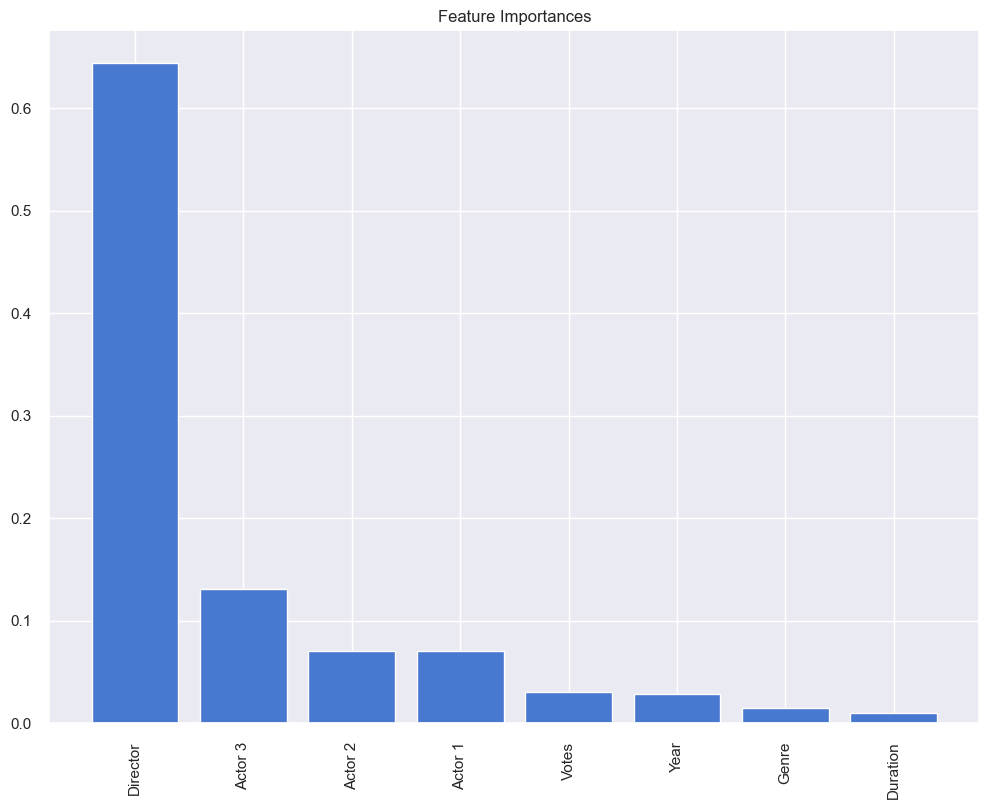

In [6886]:
fs = lgbm_model.feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame(fs,feature_names).sort_values(by=0,ascending=False)
plt.figure(figsize=(12, 9))
plt.title("Feature Importances")
plt.bar(x=feature_importances.index,height=feature_importances[0])
plt.xticks(rotation=90)

plt.show()

In [6887]:
data.head(15)

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,2005,142,Drama,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,2012,82,Horror,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
5,2014,116,Action,4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
6,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
7,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
8,1991,161,Horror,6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
9,2012,166,Comedy,5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [6888]:
new_data = pd.DataFrame({'Year':[2015],'Duration':[115],\
                         'Genre':'Comedy','Votes':[7123],'Director':['Sharat Katariya'],\
                         'Actor 1':['Jeet'],'Actor 2':['Rishi Kapoor'],'Actor 3':['Vijay Raaz'],})

In [6889]:
new_data

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
0,2015,115,Comedy,7123,Sharat Katariya,Jeet,Rishi Kapoor,Vijay Raaz


In [6890]:
new_data = encoder.transform(new_data)
new_data.loc[:,:] = scaler.transform(new_data.loc[:,:])

In [6891]:
new_data

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.433333,-0.645161,0.0,7.829787,0.716636,0.304994,0.316816,0.07503


In [6892]:
lgbm_model.predict(new_data)

array([6.7113757], dtype=float32)